# Importing Libraries :😮‍💨

In [135]:
import yfinance as yf
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Amazon Stock Price 🤑

In [98]:
# Define the ticker symbol (GOOGL for Google)
ticker_symbol = "AMZN"

# Specify the date range for historical data
start_date = "2018-01-01"
end_date = "2023-09-01"

# Fetch the data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)
# Set the frequency of the time series data to daily ('D')

# data.reset_index(inplace=True)
# Display the data
data.to_csv(f"../RawData/{start_date}_{end_date}.csv", index=False)

[*********************100%%**********************]  1 of 1 completed


# Head of Data 🫣

In [99]:
display(data.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000


# Tail of Data 🫣

In [100]:
display(data.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-25,132.470001,133.869995,130.580002,133.259995,133.259995,44147500
2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34108400
2023-08-29,133.380005,135.139999,133.250000,134.910004,134.910004,38646100
2023-08-30,134.929993,135.679993,133.919998,135.070007,135.070007,36137000
2023-08-31,135.059998,138.789993,135.000000,138.009995,138.009995,58781300


In [105]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000
...,...,...,...,...,...,...
2023-08-25,132.470001,133.869995,130.580002,133.259995,133.259995,44147500
2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34108400
2023-08-29,133.380005,135.139999,133.250000,134.910004,134.910004,38646100


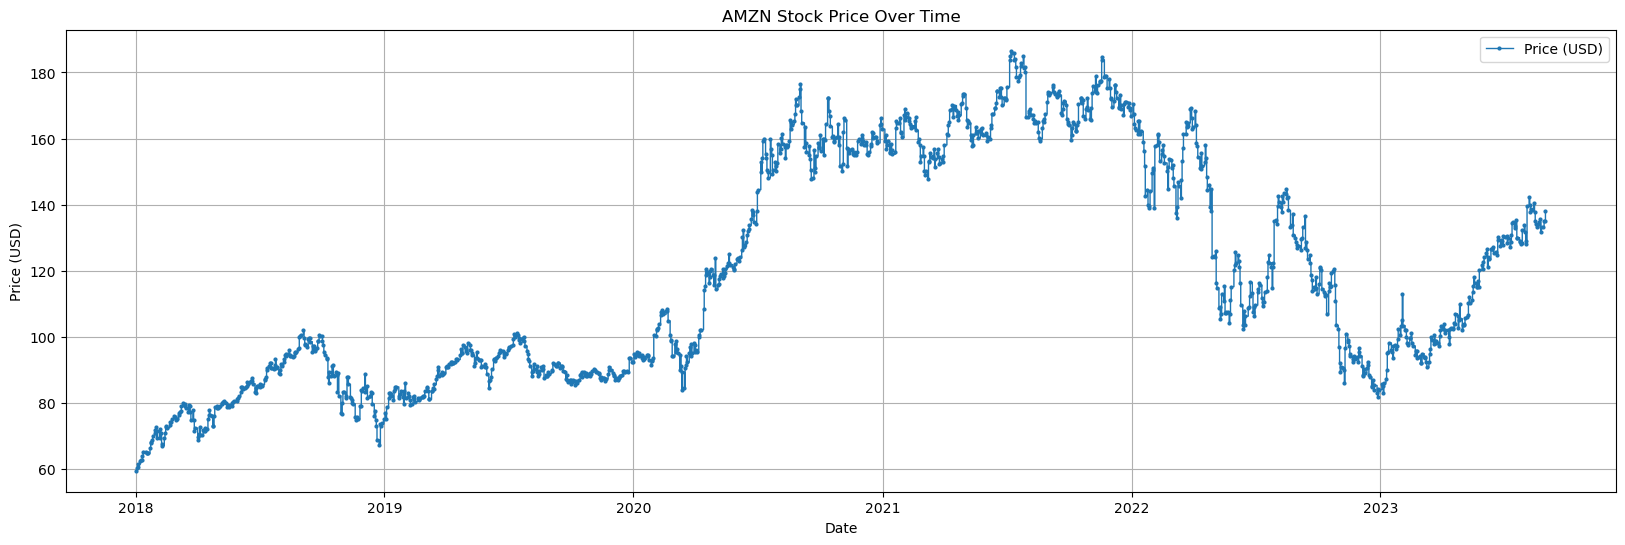

<Figure size 640x480 with 0 Axes>

In [110]:
# Extract the Adjusted Closing Prices
closing_prices = data["Close"]
closing_prices
# Plot the time series data
plt.figure(figsize=(20, 6))
plt.plot(
    closing_prices,
    marker="o",
    markersize=2,
    drawstyle="steps-post",
    linestyle="-",
    linewidth=1,
    label="Price (USD)",
)
plt.title(f"{ticker_symbol} Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()
plt.savefig("../Plots/EDAPlots/all_data_scatterPlot.png")

# Weekends Gap 


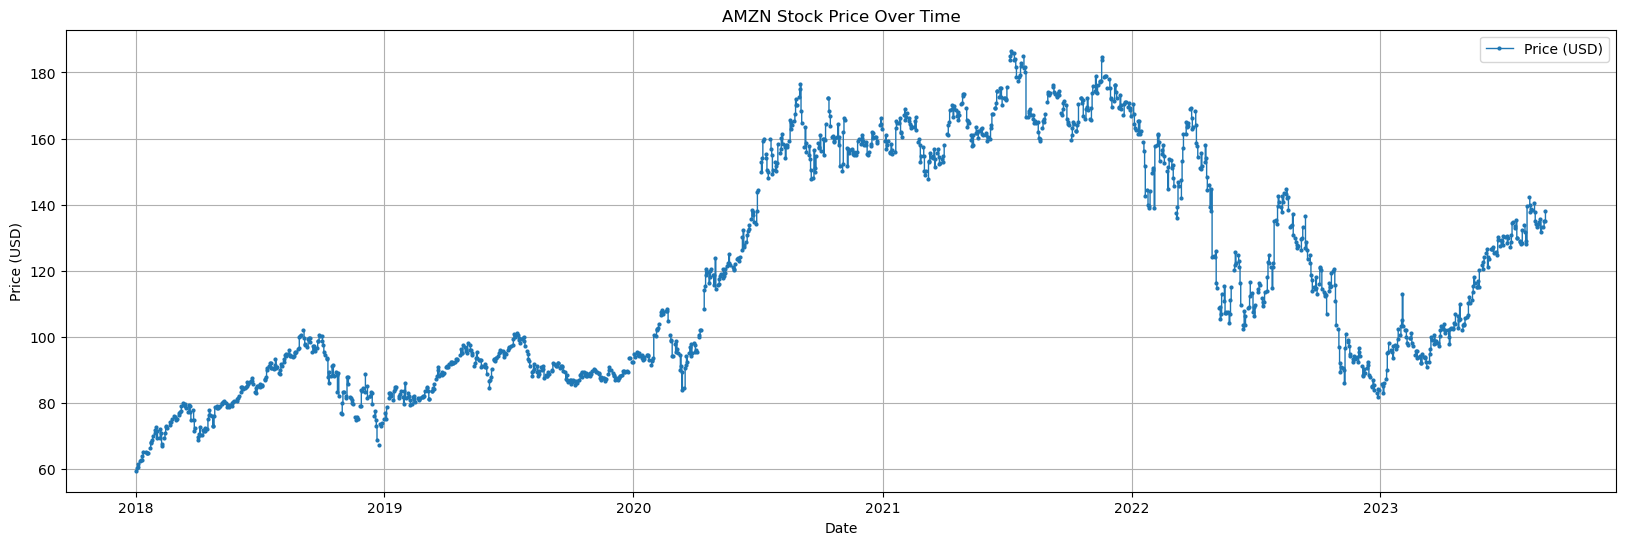

<Figure size 640x480 with 0 Axes>

In [111]:
data = data.asfreq("D")
# Extract the Adjusted Closing Prices
closing_prices = data["Adj Close"]

# Plot the time series data
plt.figure(figsize=(20, 6))
plt.plot(
    closing_prices,
    marker="o",
    markersize=2,
    drawstyle="steps-post",
    linestyle="-",
    linewidth=1,
    label="Price (USD)",
)
plt.title(f"{ticker_symbol} Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()
plt.savefig("../Plots/EDAPlots/All_data_scatter_plot_with_weekendsGaps.png")

# Decomposition of Time Series of Amazon stock price 👽

In [114]:
# Decompose the time series data into trend, seasonal, and residual components
closing_prices.fillna(0, inplace=True)
decomposition = sm.tsa.seasonal_decompose(closing_prices, model="additive")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

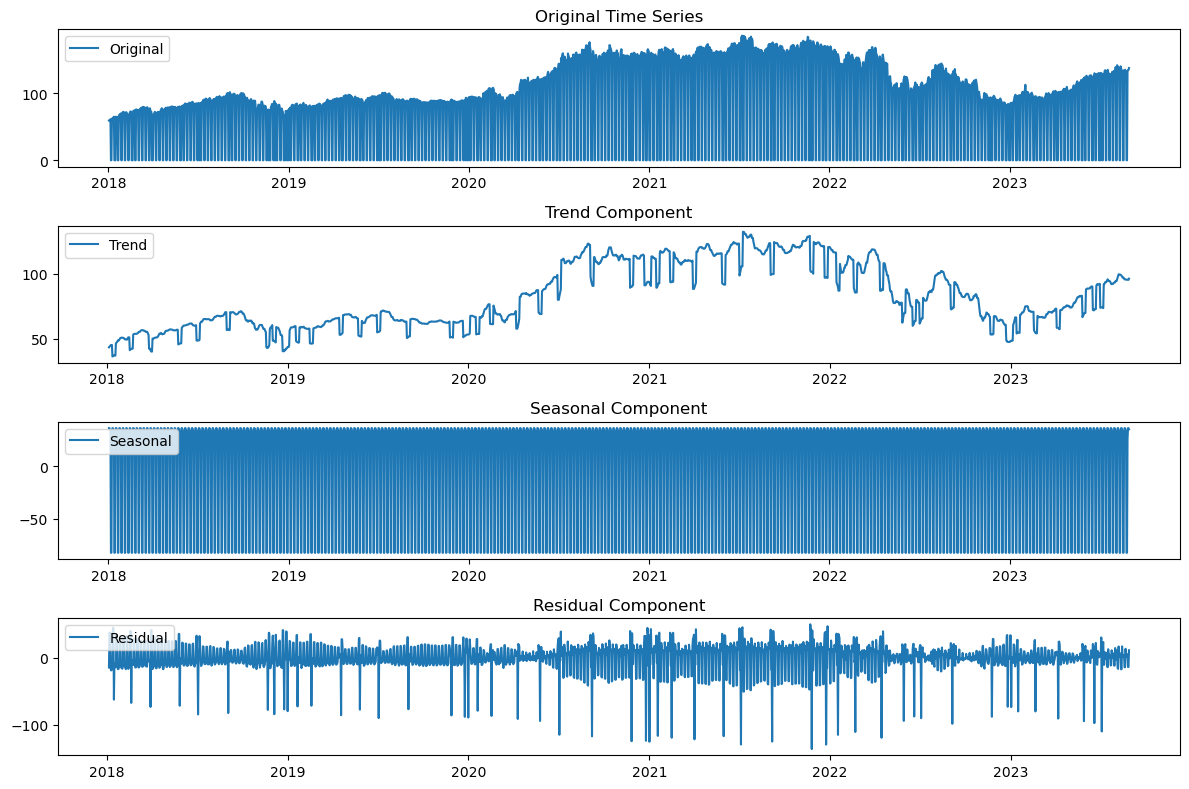

<Figure size 640x480 with 0 Axes>

In [116]:
# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(closing_prices, label="Original")
plt.legend(loc="upper left")
plt.title("Original Time Series")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="upper left")
plt.title("Trend Component")
plt.subplot(413)
plt.plot(seasonal, label="Seasonal")
plt.legend(loc="upper left")
plt.title("Seasonal Component")
plt.subplot(414)
plt.plot(residual, label="Residual")
plt.legend(loc="upper left")
plt.title("Residual Component")
plt.tight_layout()
plt.show()
plt.savefig("../Plots/EDAPlots/decompositionPlot.png")

In [119]:
data_reset_index = data.reset_index()
data_reset_index

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000.0
1,2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000.0
2,2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000.0
3,2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000.0
4,2018-01-06,NaN,NaN,NaN,NaN,0.000000,NaN
...,...,...,...,...,...,...,...
2063,2023-08-27,NaN,NaN,NaN,NaN,0.000000,NaN
2064,2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34108400.0
2065,2023-08-29,133.380005,135.139999,133.250000,134.910004,134.910004,38646100.0
2066,2023-08-30,134.929993,135.679993,133.919998,135.070007,135.070007,36137000.0


# Adding Timestamp Features 🥲

In [134]:
data_reset_index.fillna(0, inplace=True)
data_reset_index["Date"] = pd.to_datetime(data_reset_index["Date"], format="%Y-%m-%d")
data_reset_index["year"] = data_reset_index["Date"].dt.year
data_reset_index["month"] = data_reset_index["Date"].dt.month
data_reset_index["day_of_month"] = data_reset_index["Date"].dt.day
data_reset_index["day_of_week"] = data_reset_index["Date"].dt.day_of_week
data_reset_index["day_name"] = data_reset_index["Date"].dt.strftime("%A")
data_reset_index.to_csv("../ProcessedData/amazon.csv", index=False)
data_reset_index

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_month,day_of_week,day_name
0,2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000.0,2018,1,2,1,Tuesday
1,2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000.0,2018,1,3,2,Wednesday
2,2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000.0,2018,1,4,3,Thursday
3,2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000.0,2018,1,5,4,Friday
4,2018-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2018,1,6,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
2063,2023-08-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2023,8,27,6,Sunday
2064,2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34108400.0,2023,8,28,0,Monday
2065,2023-08-29,133.380005,135.139999,133.250000,134.910004,134.910004,38646100.0,2023,8,29,1,Tuesday
2066,2023-08-30,134.929993,135.679993,133.919998,135.070007,135.070007,36137000.0,2023,8,30,2,Wednesday


In [165]:
from Utils.plots import plot_scatter

x_feature_names = "Date"
y_feature_names = "Close"
plot_scatter(data_reset_index, x_feature_names, y_feature_names)